In [1]:
# !pip install kaggle

In [2]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Importing Face Mask Dataset

In [3]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

 93% 151M/163M [00:01<00:00, 148MB/s]
100% 163M/163M [00:01<00:00, 123MB/s]


In [4]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [5]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


**Importing the Dependencies**

In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [7]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_973.jpg', 'with_mask_758.jpg', 'with_mask_3000.jpg', 'with_mask_2151.jpg', 'with_mask_2539.jpg']
['with_mask_1442.jpg', 'with_mask_3372.jpg', 'with_mask_1151.jpg', 'with_mask_2375.jpg', 'with_mask_1696.jpg']


In [8]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_3420.jpg', 'without_mask_148.jpg', 'without_mask_1935.jpg', 'without_mask_68.jpg', 'without_mask_28.jpg']
['without_mask_2752.jpg', 'without_mask_1924.jpg', 'without_mask_3083.jpg', 'without_mask_3747.jpg', 'without_mask_2085.jpg']


In [9]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


**Creating Labels for the two class of Images**

with mask  -->  1

without mask  -->  0

In [10]:
# create the labels

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [11]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [12]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [13]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


**Displaying the Images**

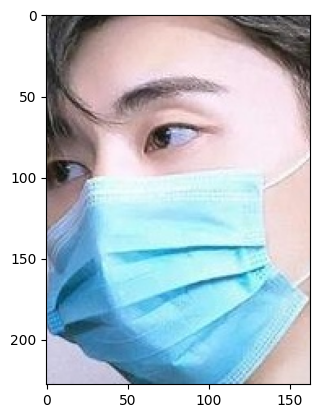

In [14]:
# displaying with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_1545.jpg')
imgplot = plt.imshow(img)
plt.show()

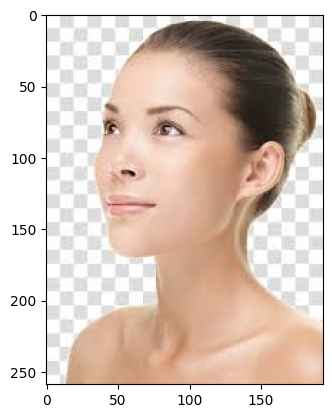

In [15]:
# displaying without mask image
img = mpimg.imread('/content/data/without_mask/without_mask_2925.jpg')
imgplot = plt.imshow(img)
plt.show()

**Image Processing**

1. Resize the Images

2. Convert the images to numpy arrays

In [16]:
# convert images to numpy arrays+

with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [17]:
type(data)

list

In [18]:
len(data)

7553

In [19]:
data[0]

array([[[ 80,  81, 109],
        [ 81,  82, 110],
        [ 82,  83, 111],
        ...,
        [ 94,  83,  91],
        [ 90,  79,  86],
        [ 85,  74,  79]],

       [[ 75,  76, 104],
        [ 78,  79, 107],
        [ 80,  81, 109],
        ...,
        [ 99,  88,  96],
        [ 97,  86,  93],
        [ 95,  84,  90]],

       [[ 75,  78, 107],
        [ 77,  81, 110],
        [ 78,  82, 111],
        ...,
        [ 98,  89,  95],
        [ 99,  90,  95],
        [ 98,  89,  94]],

       ...,

       [[ 42,  52,  92],
        [ 28,  40,  79],
        [ 32,  44,  85],
        ...,
        [205, 196, 189],
        [203, 194, 187],
        [199, 191, 186]],

       [[ 49,  62,  96],
        [ 63,  76, 110],
        [ 76,  89, 122],
        ...,
        [204, 198, 192],
        [203, 196, 191],
        [194, 186, 183]],

       [[202, 215, 247],
        [166, 179, 210],
        [102, 116, 148],
        ...,
        [196, 189, 183],
        [199, 192, 187],
        [196, 188, 185]]

In [20]:
type(data[0])

numpy.ndarray

In [21]:
data[0].shape

(128, 128, 3)

In [22]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [23]:
type(X)

numpy.ndarray

In [24]:
type(Y)

numpy.ndarray

In [25]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [26]:
print(Y)

[1 1 1 ... 0 0 0]


**Train Test Split**

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [28]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [29]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [30]:
X_train[0]

array([[[146,  93,  43],
        [146,  93,  43],
        [148,  95,  45],
        ...,
        [161, 110,  63],
        [154, 106,  59],
        [151, 107,  60]],

       [[147,  94,  44],
        [147,  94,  44],
        [149,  96,  46],
        ...,
        [161, 110,  63],
        [156, 108,  61],
        [154, 110,  63]],

       [[147,  94,  44],
        [147,  94,  44],
        [149,  96,  46],
        ...,
        [161, 110,  63],
        [157, 110,  63],
        [158, 114,  66]],

       ...,

       [[ 31,  34,  25],
        [ 31,  34,  25],
        [ 30,  33,  24],
        ...,
        [178, 124,  77],
        [176, 122,  77],
        [175, 121,  77]],

       [[ 32,  34,  26],
        [ 32,  34,  25],
        [ 31,  33,  24],
        ...,
        [175, 121,  75],
        [175, 122,  75],
        [175, 122,  77]],

       [[ 34,  35,  27],
        [ 33,  34,  26],
        [ 32,  33,  25],
        ...,
        [172, 118,  69],
        [173, 121,  73],
        [176, 125,  78]]

In [31]:
X_train_scaled[0]

array([[[0.57254902, 0.36470588, 0.16862745],
        [0.57254902, 0.36470588, 0.16862745],
        [0.58039216, 0.37254902, 0.17647059],
        ...,
        [0.63137255, 0.43137255, 0.24705882],
        [0.60392157, 0.41568627, 0.23137255],
        [0.59215686, 0.41960784, 0.23529412]],

       [[0.57647059, 0.36862745, 0.17254902],
        [0.57647059, 0.36862745, 0.17254902],
        [0.58431373, 0.37647059, 0.18039216],
        ...,
        [0.63137255, 0.43137255, 0.24705882],
        [0.61176471, 0.42352941, 0.23921569],
        [0.60392157, 0.43137255, 0.24705882]],

       [[0.57647059, 0.36862745, 0.17254902],
        [0.57647059, 0.36862745, 0.17254902],
        [0.58431373, 0.37647059, 0.18039216],
        ...,
        [0.63137255, 0.43137255, 0.24705882],
        [0.61568627, 0.43137255, 0.24705882],
        [0.61960784, 0.44705882, 0.25882353]],

       ...,

       [[0.12156863, 0.13333333, 0.09803922],
        [0.12156863, 0.13333333, 0.09803922],
        [0.11764706, 0

**Building a Convolutional Neural Networks (CNN)**

In [32]:
import tensorflow as tf
from tensorflow import keras

In [33]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [34]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [35]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 [==============================] - 15s 22ms/step - loss: 0.4878 - acc: 0.7911 - val_loss: 0.2839 - val_acc: 0.8860
Epoch 2/5
170/170 [==============================] - 3s 19ms/step - loss: 0.2987 - acc: 0.8852 - val_loss: 0.2130 - val_acc: 0.9025
Epoch 3/5
170/170 [==============================] - 3s 19ms/step - loss: 0.2505 - acc: 0.9045 - val_loss: 0.2165 - val_acc: 0.9207
Epoch 4/5
170/170 [==============================] - 3s 17ms/step - loss: 0.1943 - acc: 0.9268 - val_loss: 0.2118 - val_acc: 0.9140
Epoch 5/5
170/170 [==============================] - 3s 17ms/step - loss: 0.1626 - acc: 0.9388 - val_loss: 0.1720 - val_acc: 0.9455


**Model Evaluation**

In [36]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 [==============================] - 0s 10ms/step - loss: 0.1985 - acc: 0.9272
Test Accuracy = 0.9272005558013916


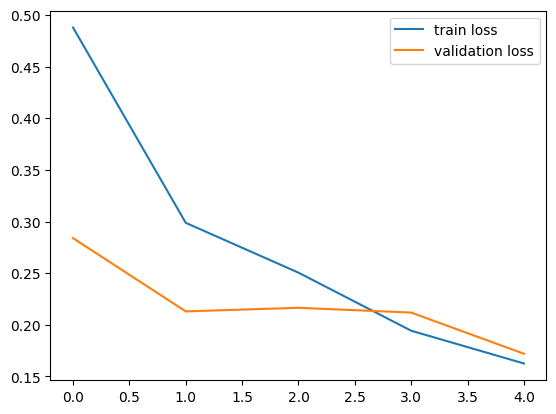

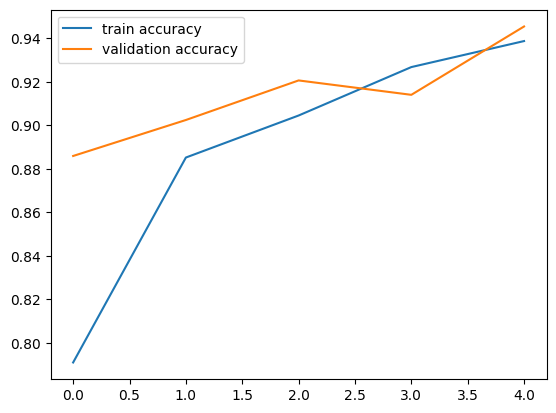

In [37]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

**Predictive System**

Path of the image to be predicted: /content/0b7f4e9b-f59c-4024-9f06-b3dc12850ab7-1920-1080.jpg


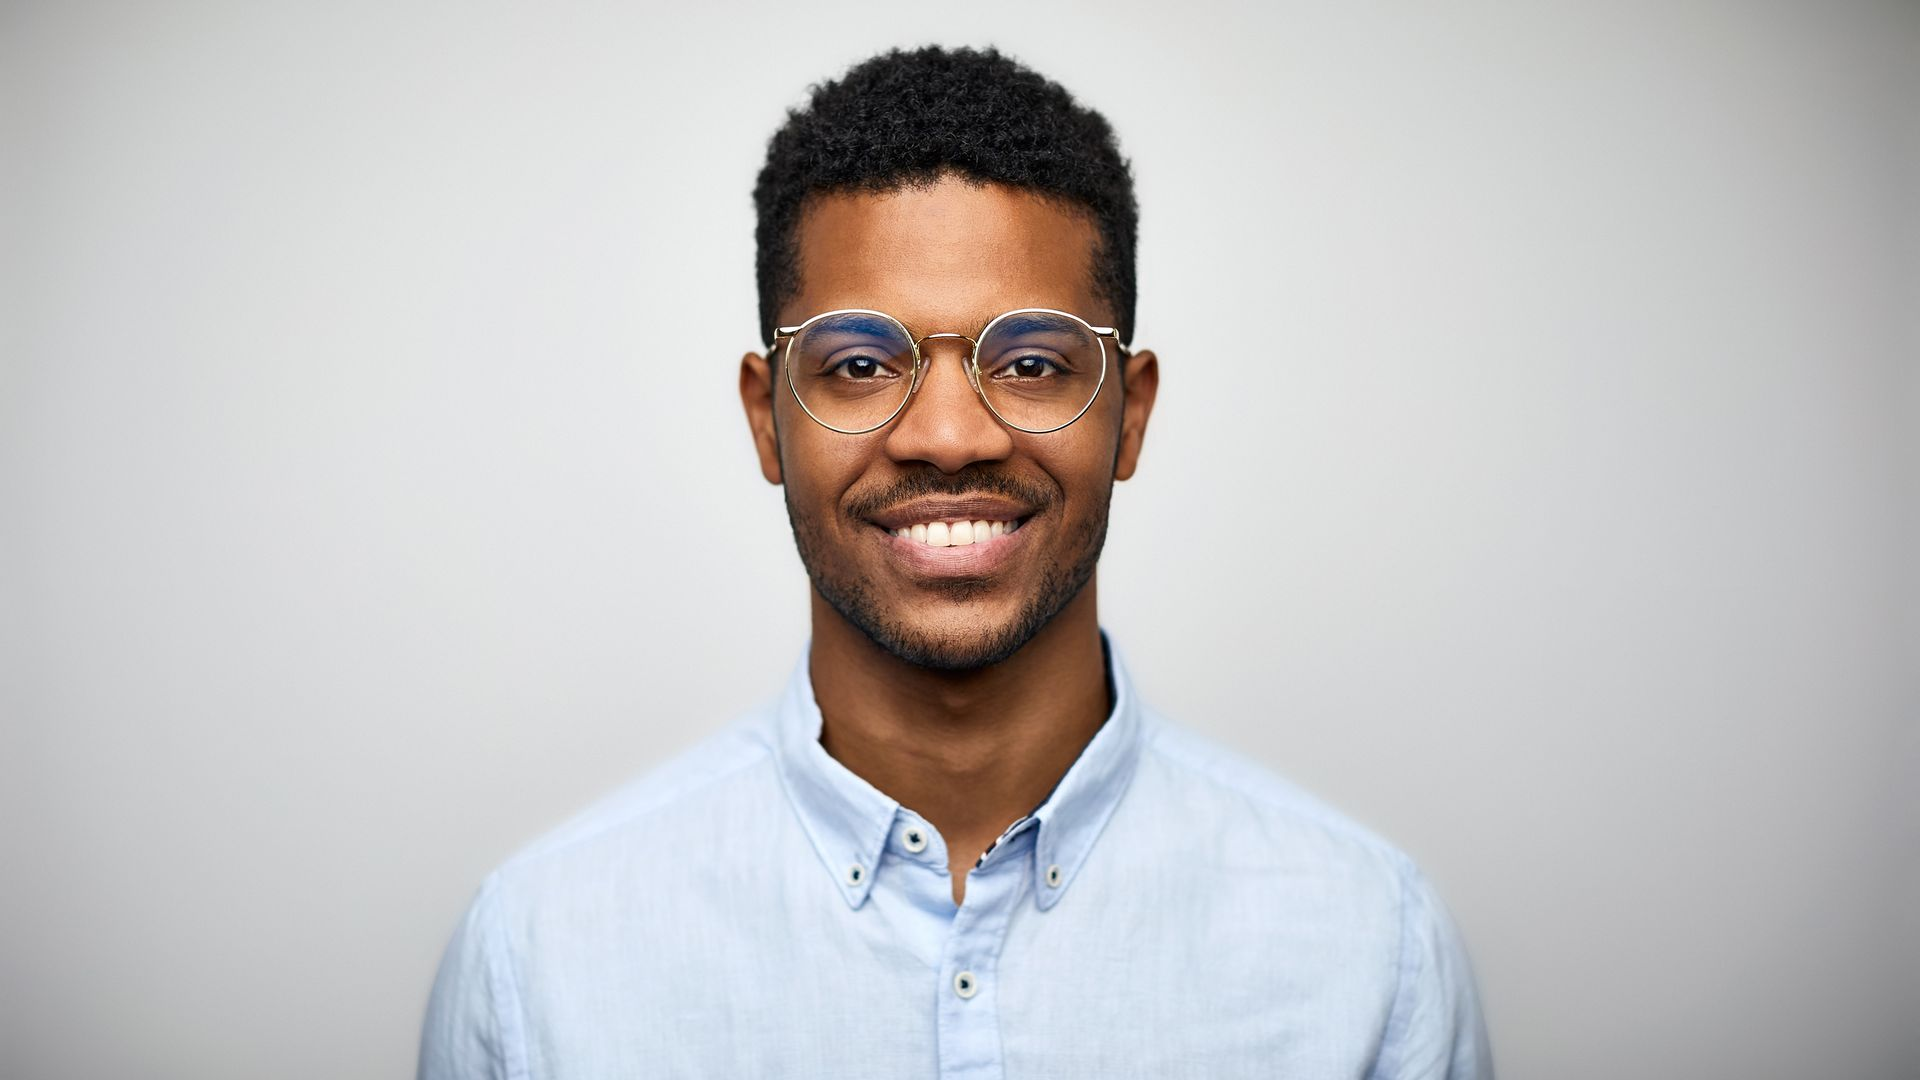

1/1 [==============================] - 0s 314ms/step
[[0.5589871  0.48771572]]
0
The person in the image is not wearing a mask


In [38]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

Path of the image to be predicted: /content/images.jpg


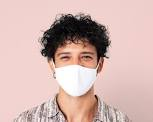

1/1 [==============================] - 0s 33ms/step
[[0.13648078 0.8660049 ]]
1
The person in the image is wearing a mask


In [39]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')